In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import plotly as ply
import numpy as np
# import seaborn as sb
import pandas as pd

from plotly.offline import init_notebook_mode
import plotly.figure_factory as ff

init_notebook_mode(connected=True) 

In [2]:
data = pd.read_csv('group1_data.csv')

In [3]:
data = data[['x1', 'x2', 'x3', 'x4', 'Category']]

header = ['X1', 'X2', 'X3', 'X4', 'Category']
data.columns = header
print(data.shape)

(635, 5)


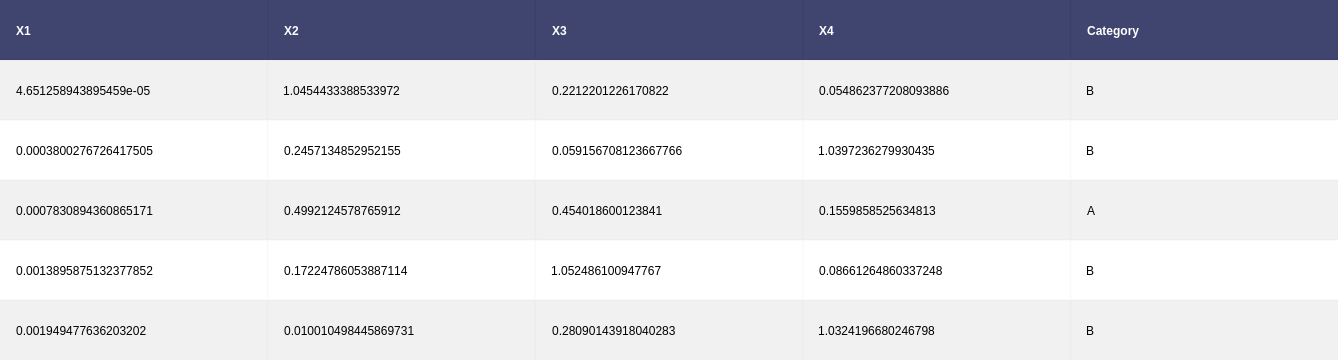

In [4]:
df_table = ff.create_table(data.head())
ply.offline.iplot(df_table, filename='iris-data-head')

In [5]:
classes = np.unique(data['Category'].values).tolist()
class_code={classes[k]: k for k in range(2)}

In [6]:
pl_colorscale=[[0.0, '#19d3f3'],
               [0.333, '#19d3f3'],
               [0.333, '#e763fa'],
               [0.666, '#e763fa'],
               [0.666, '#636efa'],
               [1, '#636efa']]

In [7]:
data_A = data[ data["Category"] == 'A']
data_B = data[ data["Category"] == 'B']

color_vals_A = [ 0 for _ in range(data_A.shape[0])]

color_vals_B = [ 1 for _ in range(data_B.shape[0])]


In [10]:
trace1 = ply.graph_objs.Splom(dimensions=[dict(label='X1', values=data_A['X1']),
                                          dict(label='X2', values=data_A['X2']),
                                          dict(label='X3', values=data_A['X3']),
                                          dict(label='X4', values=data_A['X4'])],
                                            name="A",
                #default axes name assignment :
                #xaxes= ['x1','x2',  'x3'],
                #yaxes=  ['y1', 'y2', 'y3'], 
                marker=dict(color='#636efa',
                            size=7,
#                             colorscale=pl_colorscale,
                            showscale=False,
                            line=dict(width=0.7,
                                      color='rgb(230,230,230)'))
                )

trace2 = ply.graph_objs.Splom(dimensions=[dict(label='X1', values=data_B['X1']),
                                          dict(label='X2', values=data_B['X2']),
                                          dict(label='X3', values=data_B['X3']),
                                          dict(label='X4', values=data_B['X4'])],
                                            name="B",
                #default axes name assignment :
                #xaxes= ['x1','x2',  'x3'],
                #yaxes=  ['y1', 'y2', 'y3'], 
                marker=dict(color='#19d3f3',
                            size=7,
#                             colorscale=pl_colorscale,
                            showscale=False,
                            line=dict(width=0.7,
                                      color='rgb(230,230,230)'))
                )

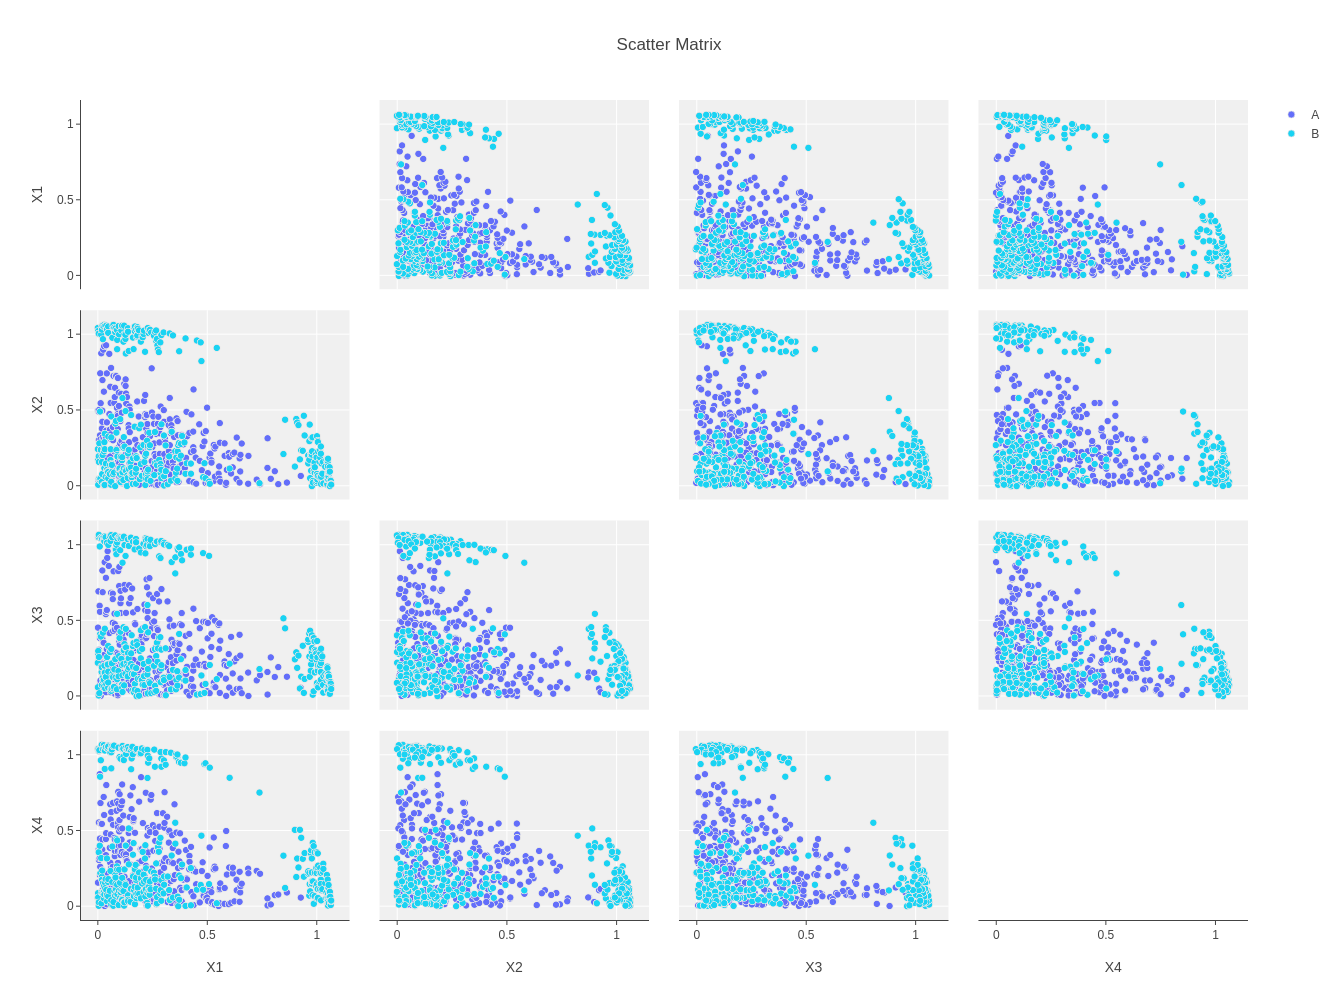

In [11]:
axis = dict(showline=True, zeroline=False, gridcolor='#fff', ticklen=4)

layout = ply.graph_objs.Layout( title='Scatter Matrix',
                               showlegend=True,
    dragmode='select',
    width=1000,
    height=1000,
    autosize=False,
    hovermode='closest',
    plot_bgcolor='rgba(240,240,240, 0.95)',
    xaxis1=dict(axis),
    xaxis2=dict(axis),
    xaxis3=dict(axis),
    xaxis4=dict(axis),
    yaxis1=dict(axis),
    yaxis2=dict(axis),
    yaxis3=dict(axis),
    yaxis4=dict(axis)
)

trace1['diagonal'].update(visible=False)
trace2['diagonal'].update(visible=False)
fig1 = dict(data=[trace1, trace2], layout=layout)
ply.offline.iplot(fig1, image='jpeg')